# House Pricing

## Data fields

Dataset source: [House_Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

Here's a brief version of what you'll find in the data description file.

|Column|Description|Column|Description|Column|Description|
|------|------|------|------|------|------|
|SalePrice | the property's sale price in dollars. This is the target variable that you're trying to predict.| MSSubClass | The building class|MSZoning | The general zoning classification|LotFrontage | Linear feet of street connected to property|
|LotArea | Lot size in square feet|Street | Type of road access|Alley | Type of alley access|LotShape | General shape of property|
|LandContour | Flatness of the property|Utilities | Type of utilities available|LotConfig | Lot configuration|LandSlope | Slope of property|
|Neighborhood | Physical locations within Ames city limits|Condition1 | Proximity to main road or railroad|Condition2 | Proximity to main road or railroad (if a second is present)|BldgType | Type of dwelling|
|HouseStyle | Style of dwelling|OverallQual | Overall material and finish quality|OverallCond | Overall condition rating|YearBuilt | Original construction date|
|YearRemodAdd | Remodel date|RoofStyle | Type of roof|RoofMatl | Roof material|Exterior1st | Exterior covering on house|
|Exterior2nd | Exterior covering on house (if more than one material)|MasVnrType | Masonry veneer type|MasVnrArea | Masonry veneer area in square feet|ExterQual | Exterior material quality|
|ExterCond | Present condition of the material on the exterior|Foundation | Type of foundation|BsmtQual | Height of the basement|BsmtCond | General condition of the basement|
|BsmtExposure | Walkout or garden level basement walls|BsmtFinType1 | Quality of basement finished area|BsmtFinSF1 | Type 1 finished square feet|BsmtFinType2 | Quality of second finished area (if present)|
|BsmtFinSF2 | Type 2 finished square feet|BsmtUnfSF | Unfinished square feet of basement area|TotalBsmtSF | Total square feet of basement area|Heating | Type of heating|
|HeatingQC | Heating quality and condition|CentralAir | Central air conditioning|Electrical | Electrical system|1stFlrSF | First Floor square feet|
|2ndFlrSF | Second floor square feet|LowQualFinSF | Low quality finished square feet (all floors)|GrLivArea | Above grade (ground) living area square feet|BsmtFullBath | Basement full bathrooms|
|BsmtHalfBath | Basement half bathrooms|FullBath | Full bathrooms above grade|HalfBath | Half baths above grade|Bedroom | Number of bedrooms above basement level|
|Kitchen | Number of kitchens|KitchenQual | Kitchen quality|TotRmsAbvGrd | Total rooms above grade (does not include bathrooms)|Functional | Home functionality rating|
|Fireplaces | Number of fireplaces|FireplaceQu | Fireplace quality|GarageType | Garage location|GarageYrBlt | Year garage was built|
|GarageFinish | Interior finish of the garage|GarageCars | Size of garage in car capacity|GarageArea | Size of garage in square feet|GarageQual | Garage quality|
|GarageCond | Garage condition|PavedDrive | Paved driveway|WoodDeckSF | Wood deck area in square feet|OpenPorchSF | Open porch area in square feet|
|EnclosedPorch | Enclosed porch area in square feet|3SsnPorch | Three season porch area in square feet|ScreenPorch | Screen porch area in square feet|PoolArea | Pool area in square feet|
|PoolQC | Pool quality|Fence | Fence quality|MiscFeature | Miscellaneous feature not covered in other categories|MiscVal | $Value of miscellaneous feature|
|MoSold | Month Sold|YrSold | Year Sold|SaleType | Type of sale|SaleCondition | Condition of sale|



## Import libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

SEED=42

sns.set_style('darkgrid')

## Auxiliary functions

In [31]:
def preprocess_columns(data, numerical_features, categorical_features):
    # Create a pipeline for numerical features
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', RobustScaler())
    ])

    # Create a pipeline for categorical features
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('label', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine numerical and categorical pipelines
    preprocessor = ColumnTransformer([
        ('numerical', numerical_pipeline, numerical_features),
        ('categorical', categorical_pipeline, categorical_features)
    ])

    transformed_data = preprocessor.fit_transform(data)
    column_names = preprocessor.get_feature_names_out()
    transformed_df = pd.DataFrame(transformed_data.toarray(), columns=column_names)
    # transformed_df = pd.DataFrame(transformed_data, columns=column_names)
    return preprocessor, transformed_df

## Import datasets

In [32]:
df = pd.read_csv('../data/01_raw/house-pricing.csv')

In [33]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Train-test-split

In [35]:
data = df.drop(columns=['Id', 'SalePrice'])
target = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2,
                                                    random_state=SEED)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1168, 79)
X_test shape: (292, 79)


# Exploration

## General Exploration

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          74 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt  

In [37]:
# Number of columns 80, number of rows 1460
# 78 features, 1 target SalesPrice
X_train.shape

(1168, 79)

In [38]:
X_train.duplicated().sum()

0

In [39]:
X_train.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      217
Alley           1094
MasVnrType       683
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

## Dependent Variable

In [40]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1168 entries, 254 to 1126
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1168 non-null   int64
dtypes: int64(1)
memory usage: 18.2 KB


In [41]:
y_train.describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [42]:
y_train.sort_values(ascending=False).head(10)

1182    745000
1169    625000
803     582933
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
527     446261
Name: SalePrice, dtype: int64

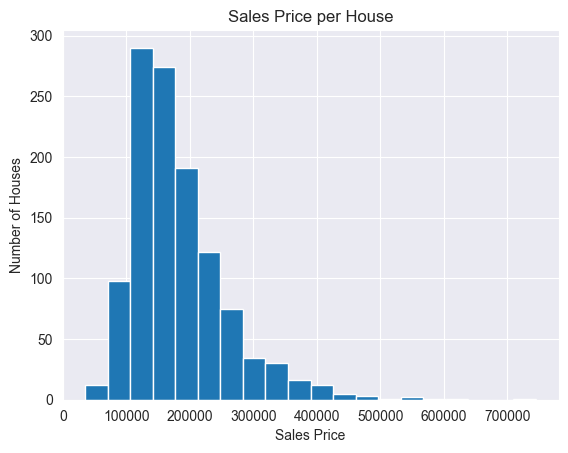

In [43]:
plt.hist(y_train, bins=20)
plt.title('Sales Price per House')
plt.xlabel('Sales Price')
plt.ylabel('Number of Houses')
plt.show()

## Independent Variables

In [44]:
X_train.dtypes.value_counts()

object     43
int64      33
float64     3
Name: count, dtype: int64

In [45]:
X_train.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      217
Alley           1094
MasVnrType       683
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

In [46]:
# save numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(f'Numerical columns: {len(num_cols)}')
print(f'Categorical columns: {len(cat_cols)}')

Numerical columns: 36
Categorical columns: 43


### Categorical features

In [47]:
for col in X_train[cat_cols]:
    print(col, X_train[col].unique())

MSZoning ['RL' 'RM' 'FV' 'RH' 'C (all)']
Street ['Pave' 'Grvl']
Alley [nan 'Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['NAmes' 'Gilbert' 'Edwards' 'SWISU' 'CollgCr' 'IDOTRR' 'NWAmes' 'Somerst'
 'Sawyer' 'Crawfor' 'OldTown' 'Timber' 'BrkSide' 'SawyerW' 'NridgHt'
 'Mitchel' 'NoRidge' 'Blmngtn' 'BrDale' 'NPkVill' 'Veenker' 'ClearCr'
 'StoneBr' 'MeadowV' 'Blueste']
Condition1 ['Norm' 'Feedr' 'RRAn' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRNn' 'RRNe']
Condition2 ['Norm' 'RRNn' 'PosA' 'Feedr' 'RRAe' 'PosN' 'Artery' 'RRAn']
BldgType ['1Fam' 'Duplex' 'TwnhsE' '2fmCon' 'Twnhs']
HouseStyle ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '1.5Unf' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Mansard' 'Gambrel' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'WdShake' 'Metal' 'Tar&Grv' 'ClyTile' 'Roll']
Exterior1st ['MetalSd' 'VinylSd' 'Wd Sdng' 

### Numerical features

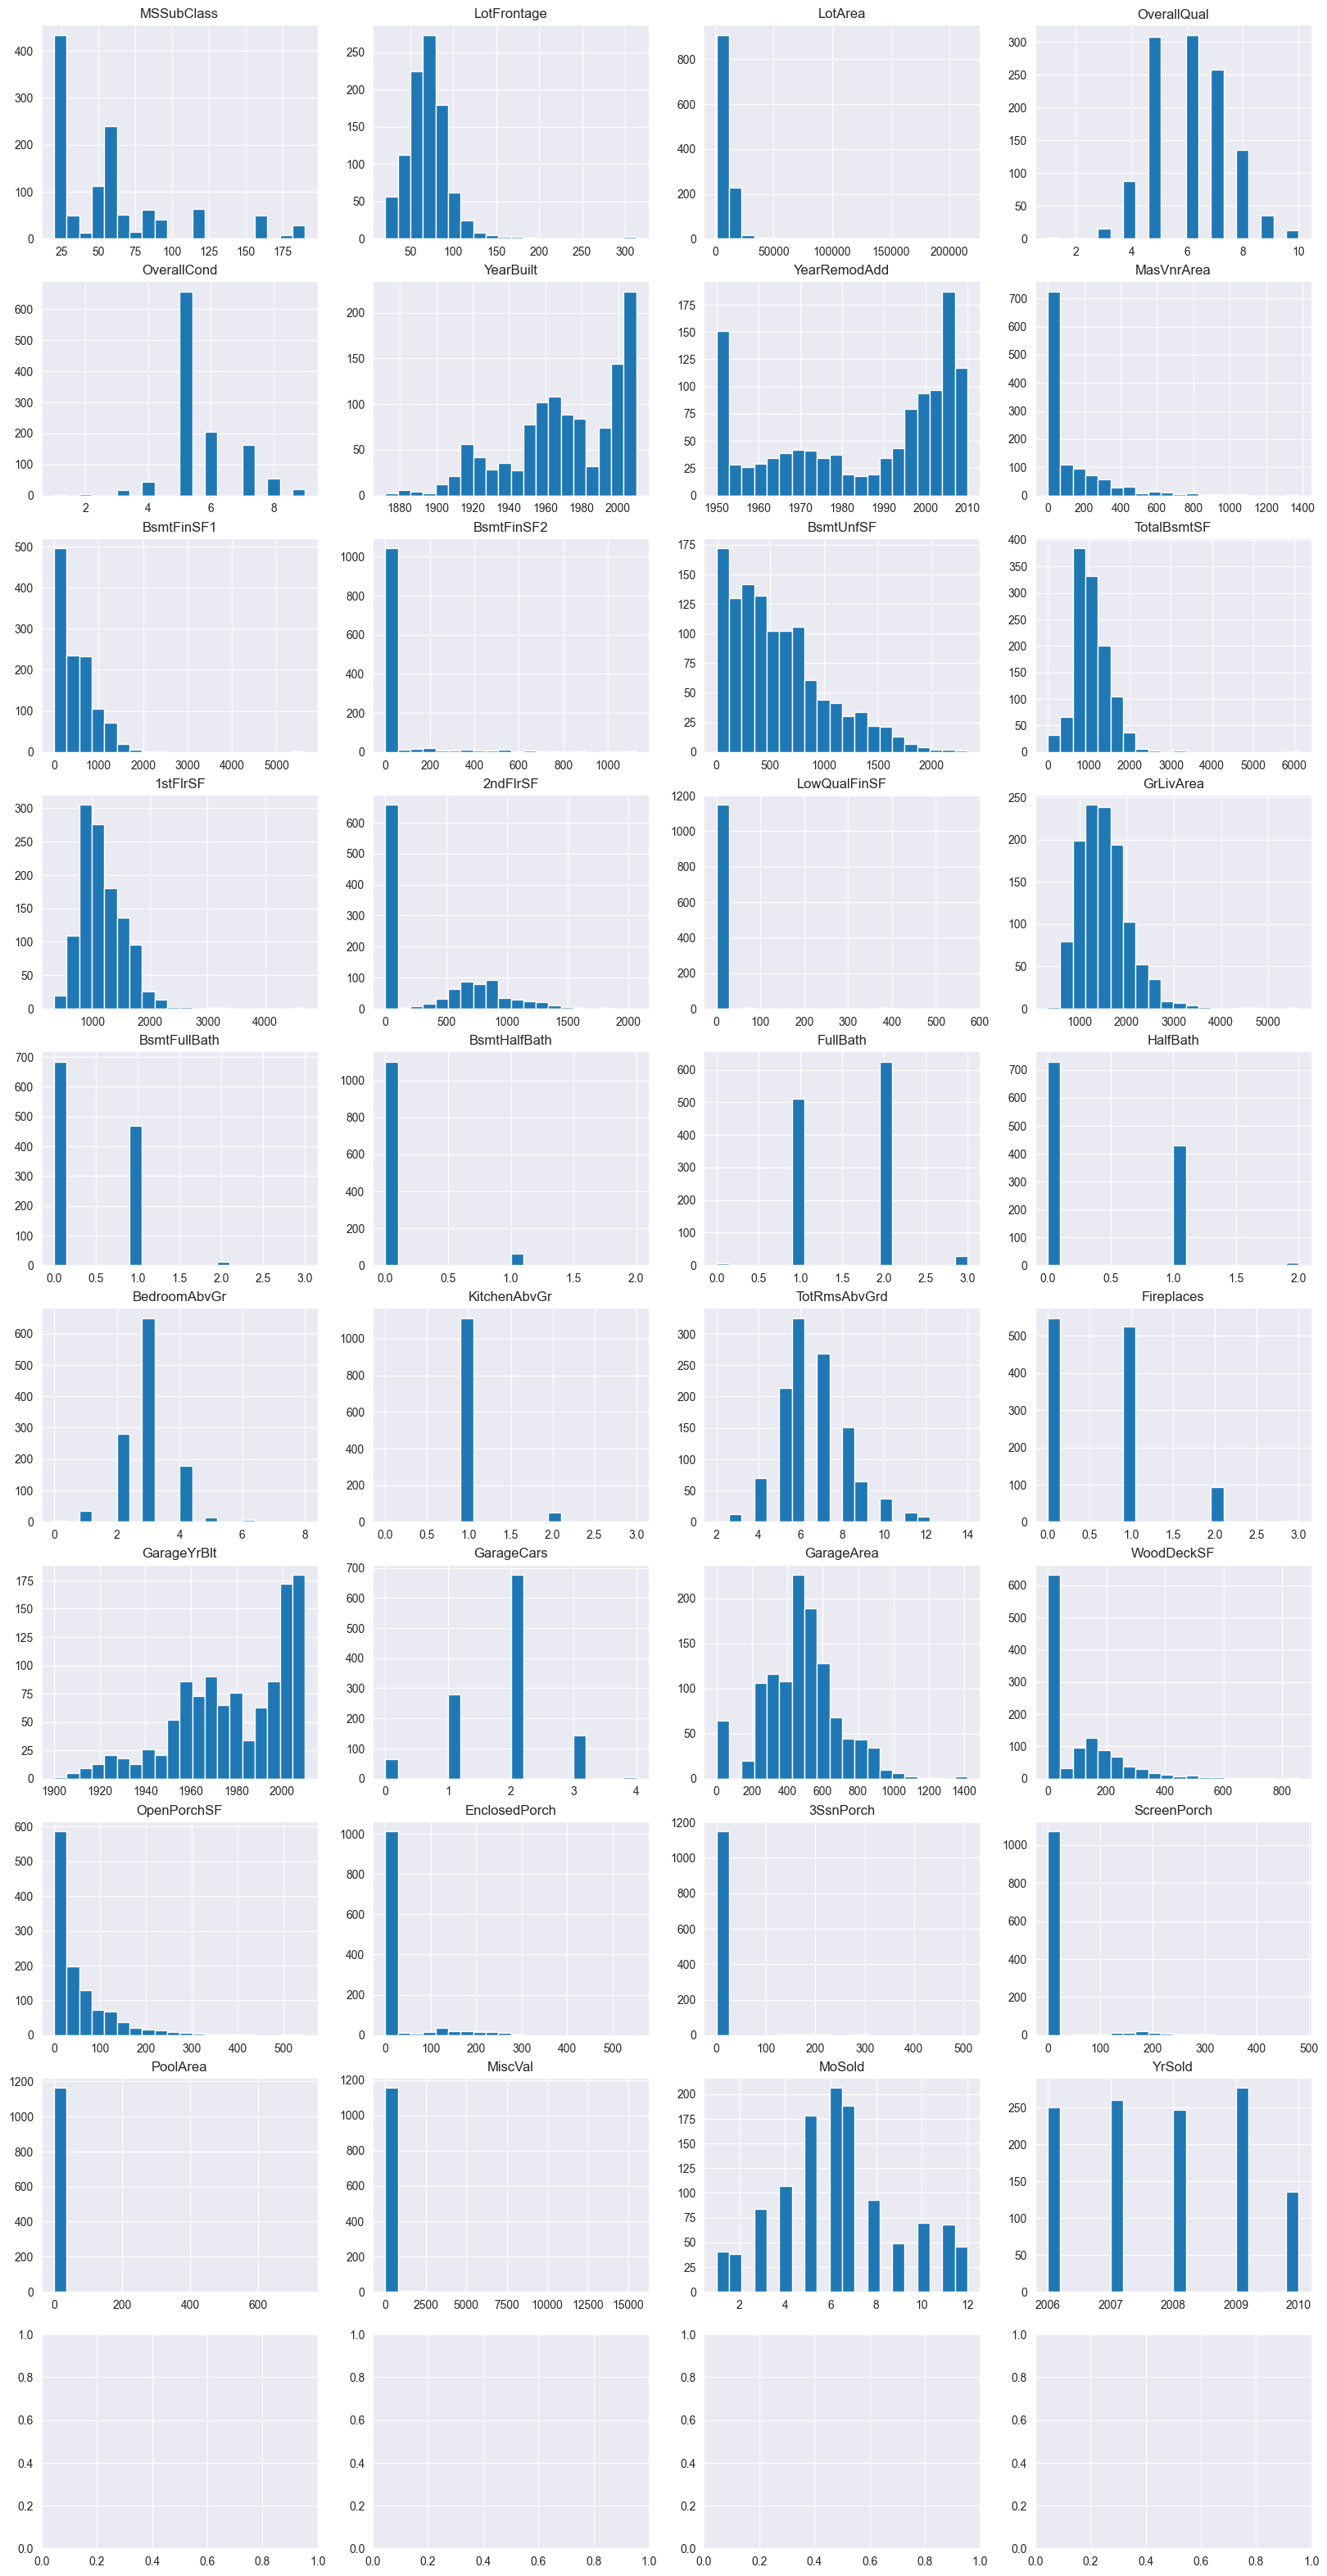

In [48]:
# plot histograms for numerical columns in one figure
fig, axes = plt.subplots(10, 4, figsize=(20, 40))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.hist(X_train[col], bins=20)
    ax.set_title(col)

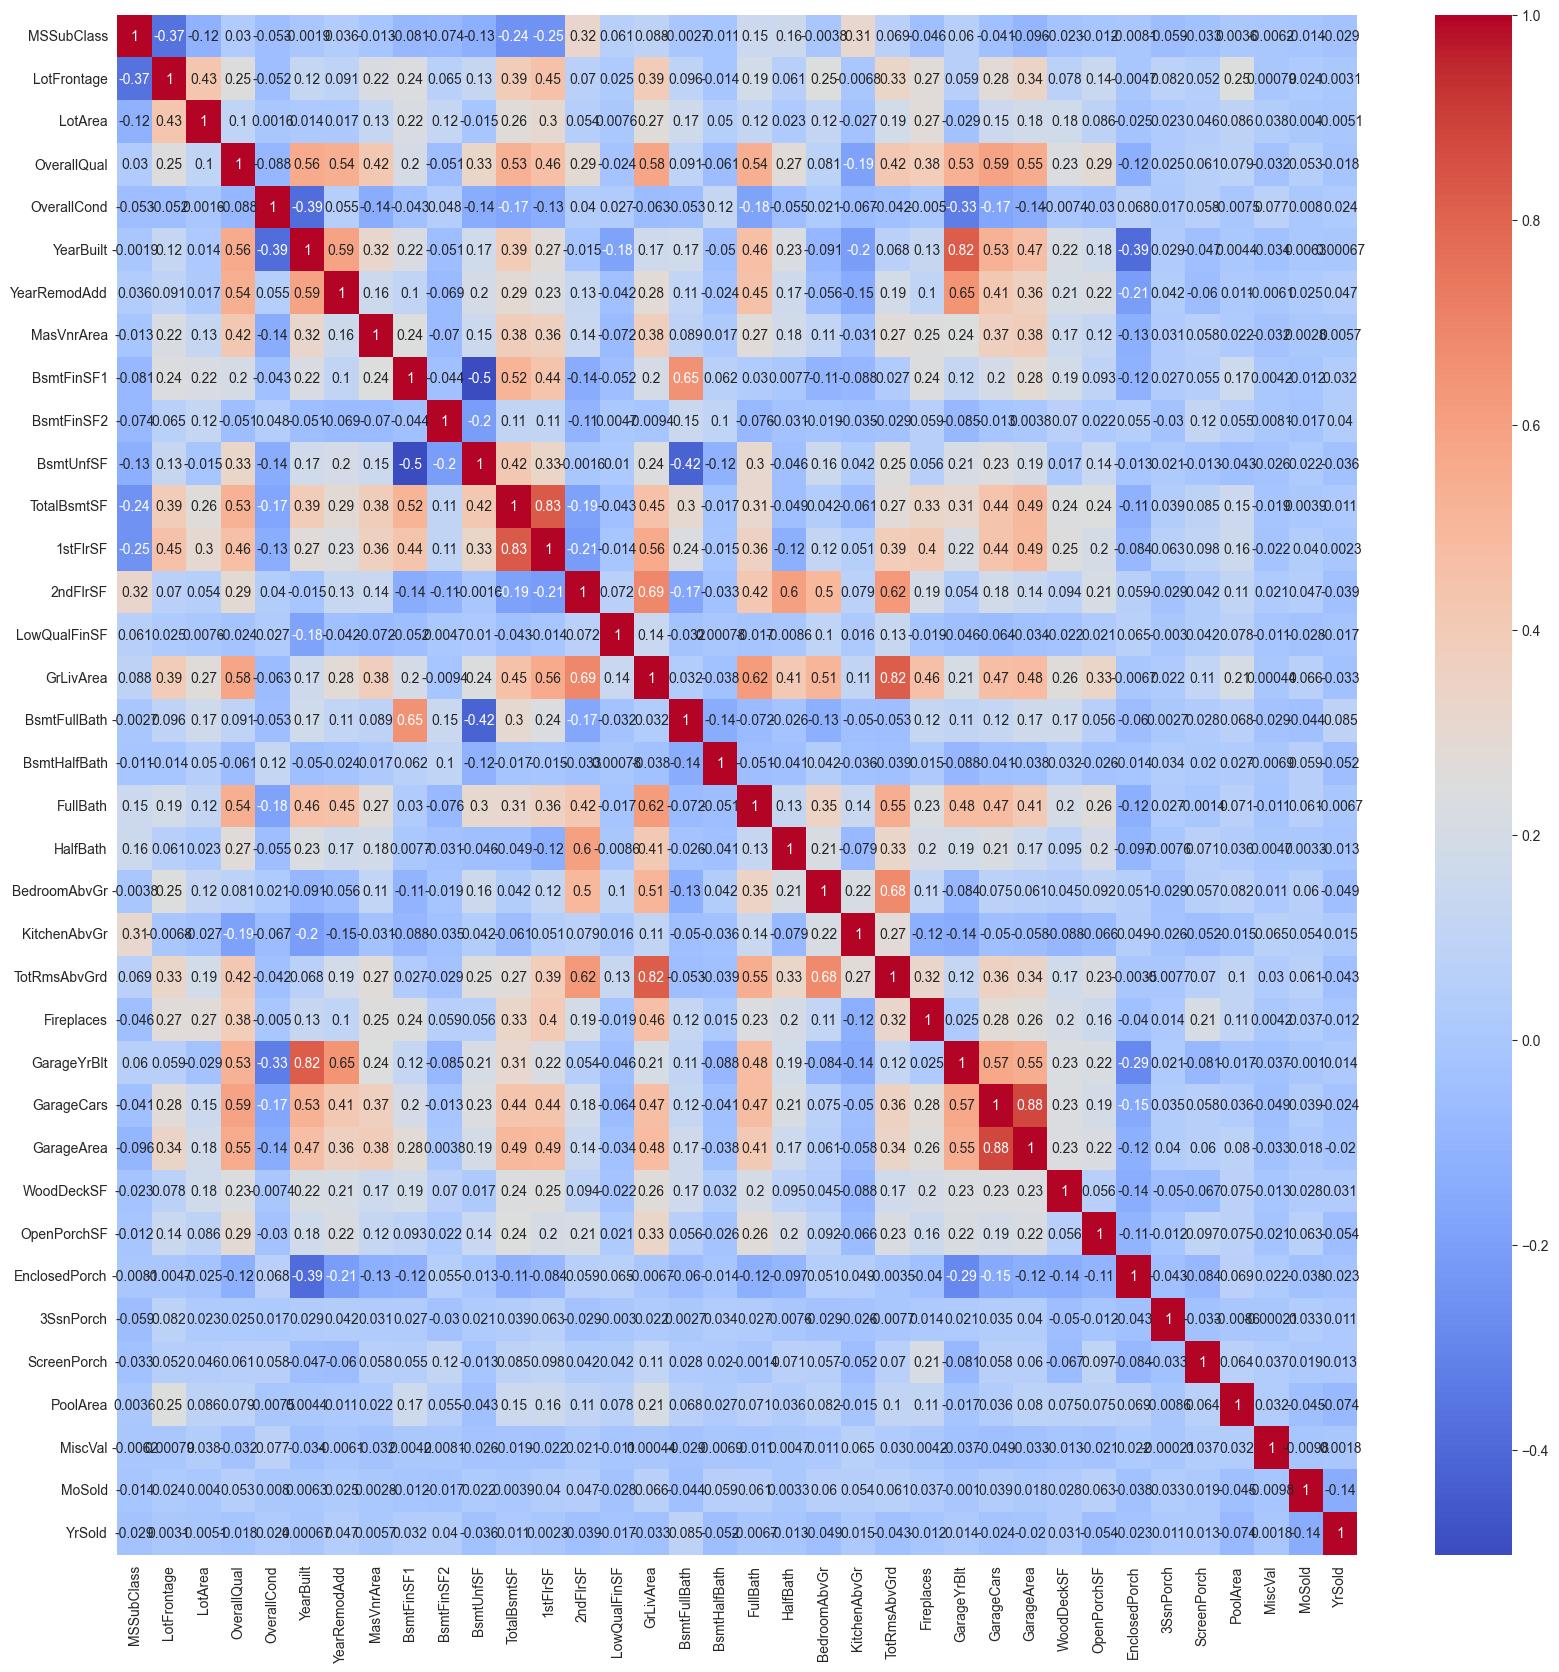

In [49]:
# plot a heatmap to see the correlation between the features
plt.figure(figsize=(20, 20))
sns.heatmap(X_train[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

# Summary for Data Exploration

General:
- Goal is to predict house prices
- 1460 houses in the dataset
- In total 80 columns, some of these features seem irrelevant, we have to check which ones to use for the final models

Dependet variable - SalePrice:
- is continues, so we have a Regression problem
- No NaN or 0 values
- Distribution looks almost normal distributed
- Some very high values for the house prices, but we will not consider them as outliers, because this would remove information

Independent variables:
- The dataset consist of 36 numerical and 43 categorical features
- Some features are associated to other features, like PoolQC and PoolArea
- Some features just have NaN values or a lot of zeros as values

**Next steps:**
- Remove the columns below and there associated columns, because only NaNs.
   - cols_with_only_nans : 
      - "Alley"
      - "FireplaceQu"
      - "PoolQC"
      - "Fence"
      - "MiscFeature"
   - associated_cols : 
      - "PoolArea"
      - "MiscVal"
- Treat NaN values of other columns with an Imputer. For the categorical we will impute the most frequent value and for the numerical the mean.
- If this is done, we will scale all numerical features and apply one-hot-encoding on the categorical features to prepare them for modeling stage.


# Pre-Processing

In [50]:
# Remove the columns with only missing values and the associated columns
cols_with_only_nans = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
associated_cols = ['PoolArea','MiscVal']

X_train.drop(columns=cols_with_only_nans + associated_cols, inplace=True)
X_test.drop(columns=cols_with_only_nans + associated_cols, inplace=True)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1168, 72)
X_test shape: (292, 72)


In [51]:
# Define categorical and numerical columns.
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

print(f"Number of all columns: {len(categorical)+ len(numerical)}")

Categorical columns are: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns are: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 

In [52]:
transformer, X_train = preprocess_columns(X_train, numerical, categorical)

X_test = pd.DataFrame(transformer.transform(X_test).toarray(), 
                      columns=transformer.get_feature_names_out())

X_train.head()

,numerical__MSSubClass,numerical__LotFrontage,numerical__LotArea,numerical__OverallQual,numerical__OverallCond,numerical__YearBuilt,numerical__YearRemodAdd,numerical__MasVnrArea,numerical__BsmtFinSF1,numerical__BsmtFinSF2,...,categorical__SaleType_ConLw,categorical__SaleType_New,categorical__SaleType_Oth,categorical__SaleType_WD,categorical__SaleCondition_Abnorml,categorical__SaleCondition_AdjLand,categorical__SaleCondition_Alloca,categorical__SaleCondition_Family,categorical__SaleCondition_Normal,categorical__SaleCondition_Partial
0,-0.6,-0.018097,-0.291776,-0.5,1.0,-0.312500,-0.973684,0.000000,0.745492,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.2,-0.597045,-0.428667,0.0,2.0,0.437500,0.000000,0.000000,-0.533287,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.4,-0.175992,-0.200109,-0.5,2.0,-1.291667,-1.157895,0.000000,-0.533287,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.544413,-0.583551,-0.5,2.0,-0.729167,-1.157895,1.518072,0.255895,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-1.070729,-1.118473,-0.5,1.0,-1.000000,-1.157895,0.000000,-0.230929,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
X_test.head()

,numerical__MSSubClass,numerical__LotFrontage,numerical__LotArea,numerical__OverallQual,numerical__OverallCond,numerical__YearBuilt,numerical__YearRemodAdd,numerical__MasVnrArea,numerical__BsmtFinSF1,numerical__BsmtFinSF2,...,categorical__SaleType_ConLw,categorical__SaleType_New,categorical__SaleType_Oth,categorical__SaleType_WD,categorical__SaleCondition_Abnorml,categorical__SaleCondition_AdjLand,categorical__SaleCondition_Alloca,categorical__SaleCondition_Family,categorical__SaleCondition_Normal,categorical__SaleCondition_Partial
0,-0.6,-0.018097,-0.288372,0.0,3.0,-0.187500,0.236842,0.000000,0.386269,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.2,1.455587,0.645797,1.0,0.0,0.458333,0.026316,2.180723,0.898058,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.4,-0.754939,-0.155614,-0.5,1.0,-0.937500,-1.157895,0.000000,-0.533287,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-1.070729,-1.118473,0.0,2.0,-0.520833,-1.157895,0.000000,0.020111,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.6,0.981903,0.801897,1.5,0.0,0.729167,0.368421,0.421687,0.884189,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Selection

In [54]:
n = -1
random_state = 42

regressor = [
            DecisionTreeRegressor(random_state=random_state, max_depth=10),
            RandomForestRegressor(n_jobs=n, random_state=random_state, max_depth=10),
            GradientBoostingRegressor(random_state=random_state, max_depth=6)
            ]

In [55]:
def train_and_score(regressor, X_train, y_train, X_test, y_test):
    models = {}
    scores = pd.DataFrame(columns=["regressor",'train_score', 'test_score'])
    for reg in regressor:
        reg.fit(X_train, y_train)
        # scores[clf.__class__.__name__] = clf.score(X_test, y_test)

        scores.loc[len(scores)] =  [reg.__class__.__name__,
                                    np.round(reg.score(X_train, y_train),2), 
                                    np.round(reg.score(X_test, y_test),2)]
        models[reg.__class__.__name__] = reg
    return scores, models

In [56]:
model_scores, models = train_and_score(regressor, X_train, y_train, X_test, y_test)
model_scores

,regressor,train_score,test_score
0,DecisionTreeRegressor,0.99,0.77
1,RandomForestRegressor,0.98,0.89
2,GradientBoostingRegressor,1.00,0.91


In [57]:
best_model = model_scores.loc[model_scores['test_score'].idxmax()]['regressor']
best_model = models[best_model]

best_model

GradientBoostingRegressor(max_depth=6, random_state=42)

In [58]:
# get for best model the feature importance and sort it from high to low, add the feature names
feature_importance = pd.DataFrame(best_model.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importance

,importance
numerical__OverallQual,0.577440
numerical__GrLivArea,0.118200
numerical__2ndFlrSF,0.031904
numerical__TotalBsmtSF,0.031074
numerical__1stFlrSF,0.029374
...,...
categorical__Condition2_PosA,0.000000
categorical__RoofMatl_Roll,0.000000
categorical__Condition2_Artery,0.000000
categorical__RoofMatl_WdShake,0.000000


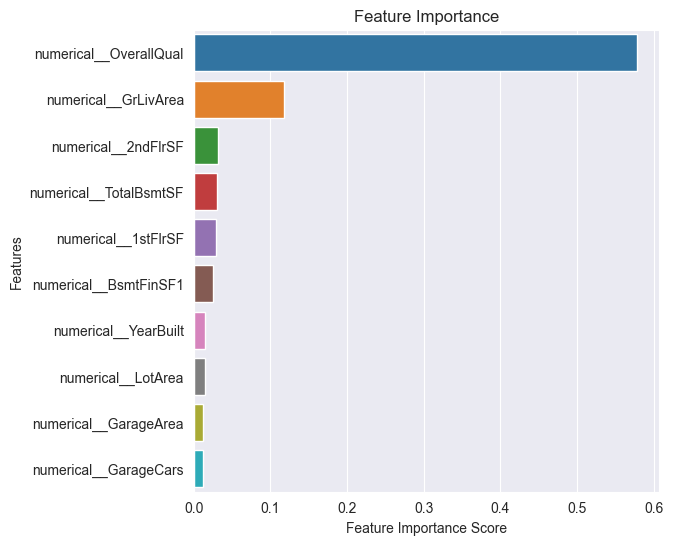

In [72]:
# plot feature importance, only the top 20
plt.figure(figsize=(6, 6))
sns.barplot(x=feature_importance.importance[:10], y=feature_importance.index[:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
sns.set_style("darkgrid")
plt.show()

In [67]:
feature_importance.importance[:10].sum()

0.8652513537234707

In [70]:
# print the column names of top 10 features from feature importance as bullet points
for i, col in enumerate(feature_importance.index[:10]):
    print(f'{i+1}. {col}')

1. numerical__OverallQual
2. numerical__GrLivArea
3. numerical__2ndFlrSF
4. numerical__TotalBsmtSF
5. numerical__1stFlrSF
6. numerical__BsmtFinSF1
7. numerical__YearBuilt
8. numerical__LotArea
9. numerical__GarageArea
10. numerical__GarageCars
